# About the Dataset

**Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows taken from the UCI Machine Learning Repository**

**Feature**
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12.

- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.
- LSTAT: % lower status of the population

**target**
- MEDV: Median value of owner-occupied homes in $1000


We can see that the input attributes have a mixture of units.

# Download Dataset from Kaggle

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d vikrishnan/boston-house-prices

boston-house-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip boston-house-prices.zip

Archive:  boston-house-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# EDA

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the DataFrame from Csv file

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delimiter=r"\s+",names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [11]:
df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [12]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

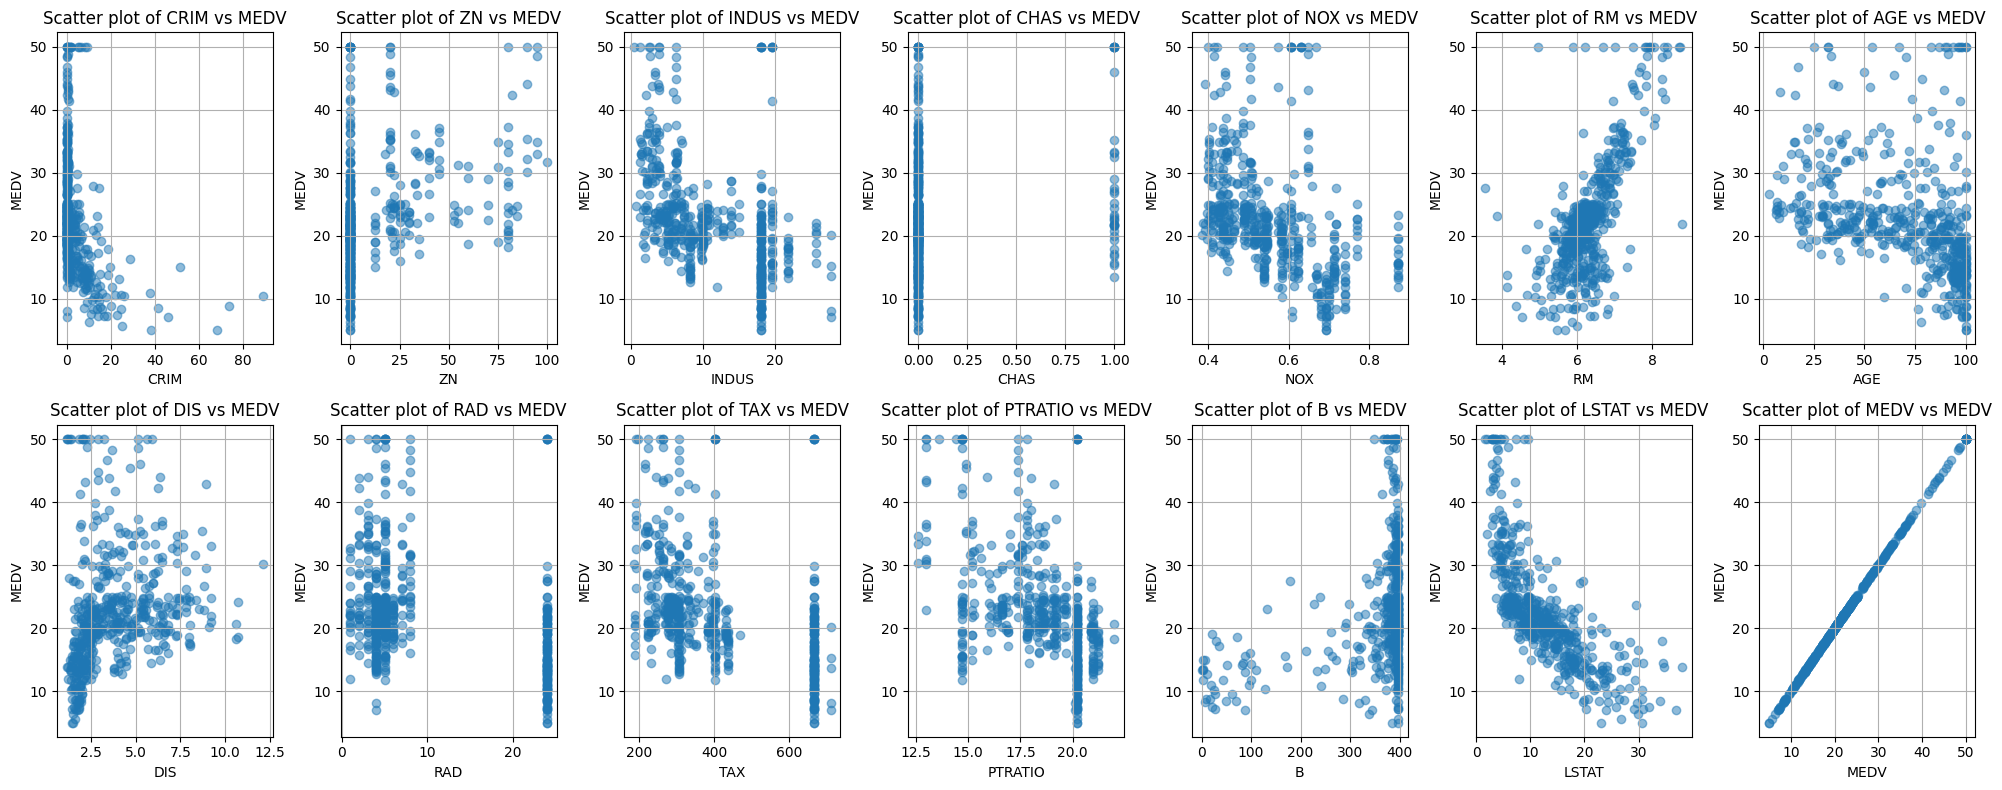

In [214]:
fig, axs = plt.subplots(2, 7, figsize=(20, 8))
axs = axs.flatten()
# Plot scatter plots for each feature column against the target column
for i, column in enumerate(df.columns):
    axs[i].scatter(df[column], df['MEDV'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {column} vs MEDV')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('MEDV')
    axs[i].grid(True)

# Hide empty subplots
for i in range(len(df.columns), 2 * 7):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

we noticed that : our data is non-linear

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


we noticed that:
- there is outliers in columns:
(CRIM - ZN) according to there 75% and max values
and outliers in columns (B) according to min and 25% values
- there is a variety of scale between columns

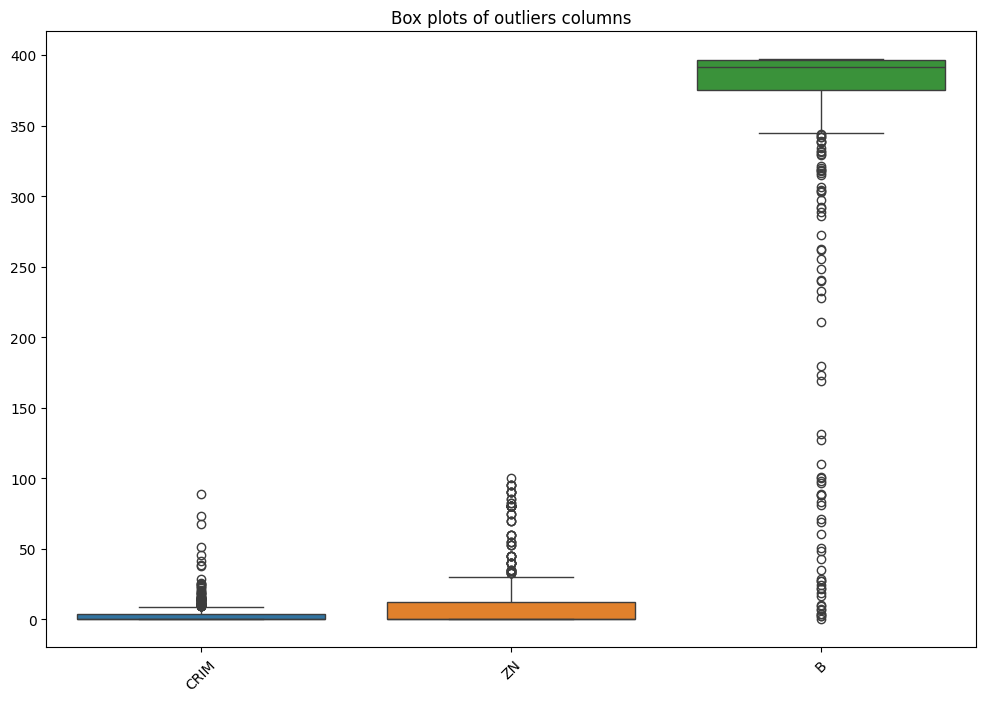

In [14]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df[['CRIM','ZN','B']])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

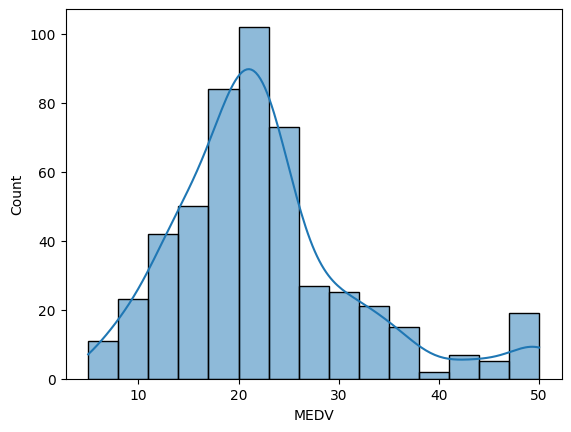

In [15]:
sns.histplot(df['MEDV'],kde=True,bins=15)

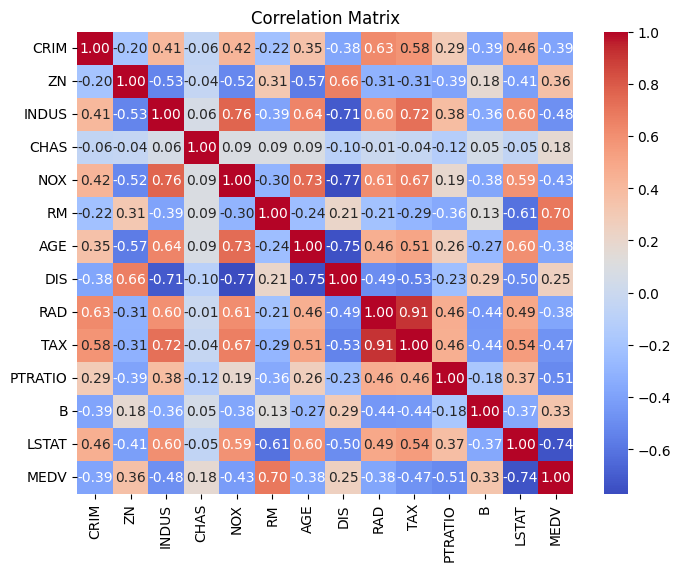

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

we noticed that:
-  RAD and Tax are highly correlated with 91%

# PreProcessing

solve Outlier problems:

In [17]:
def remove_outliers_iqr(df, multiplier=1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)]

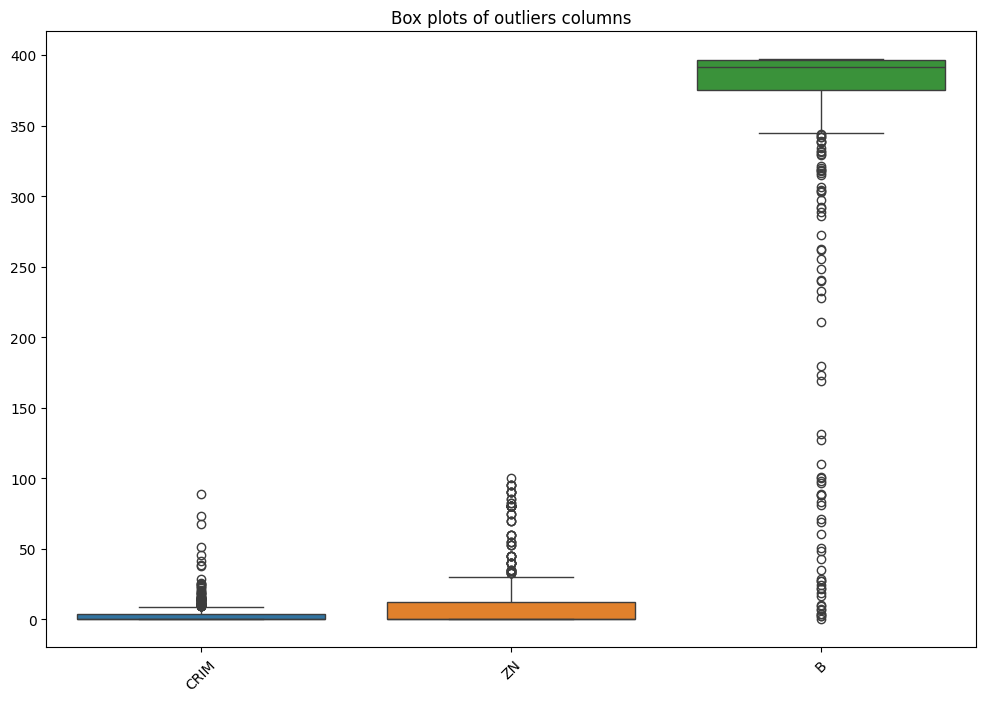

In [18]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df[['CRIM','ZN','B']])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [19]:
df.shape

(506, 14)

In [142]:
df1 = df.copy()
df1[['CRIM','ZN','B']] = remove_outliers_iqr(df1[['CRIM','ZN','B']])

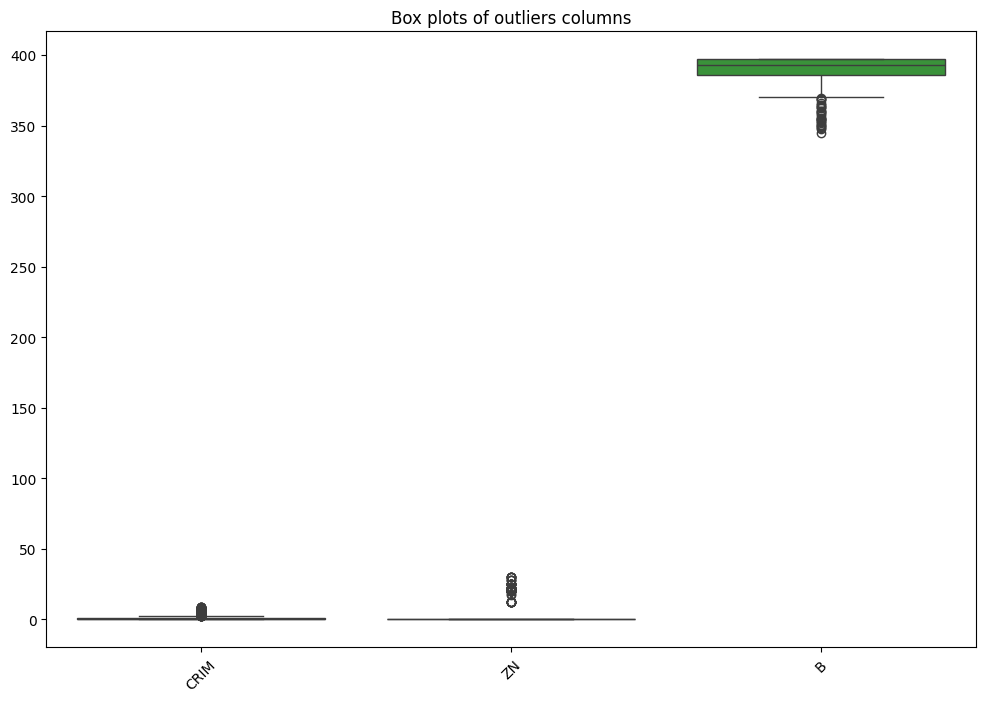

In [141]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df1[['CRIM','ZN','B']])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     440 non-null    float64
 1   ZN       438 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        429 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
df1.isna().sum()

CRIM       66
ZN         68
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          77
LSTAT       0
MEDV        0
dtype: int64

In [24]:
df_filled = df1.fillna(df1.mean())
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


solve Correlation problem:

In [25]:
df_filled = df_filled.drop('RAD',axis =1)
df_filled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


solve the scale problem : normalize the data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filled)
scaled_df = pd.DataFrame(scaled_data, columns=df_filled.columns)

In [27]:
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.601347,2.037122,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.796867,-1.075562,0.159686
1,-0.590758,-0.439275,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.796867,-0.492439,-0.101524
2,-0.590768,-0.439275,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.401073,-1.208727,1.324247
3,-0.588206,-0.439275,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.576117,-1.361517,1.182758
4,-0.569701,-0.439275,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.796867,-1.026501,1.487503


split df to train and test

In [28]:
X = scaled_df.copy()
y = X.pop('MEDV')

In [29]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.601347,2.037122,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.796867,-1.075562
1,-0.590758,-0.439275,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.796867,-0.492439
2,-0.590768,-0.439275,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.401073,-1.208727
3,-0.588206,-0.439275,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.576117,-1.361517
4,-0.569701,-0.439275,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.796867,-1.026501


In [30]:
y.head()

0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: MEDV, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

Polynomial Regression

In [218]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

In [219]:
from sklearn.linear_model import LinearRegression

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

ElasticNet

In [220]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_poly, y_train)

ElasticNet(alpha=0.1)

KernelRidge

In [221]:
from sklearn.kernel_ridge import KernelRidge
# Kernel Ridge Regression model
krr = KernelRidge(kernel='rbf', gamma=0.1)  # RBF kernel
krr.fit(X_train, y_train)

KernelRidge(gamma=0.1, kernel='rbf')

Support Vector Regression

In [222]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  # You can also use other kernels like 'rbf', 'poly', etc.
svr.fit(X_train, y_train)

SVR()

Random Forest Regressor

In [223]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

xg-boost

In [224]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

GradientBoostingRegressor

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# Evaluation

In [242]:
from sklearn.metrics import r2_score
records = []

In [243]:
X_test_poly = poly_features.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
record = {"model":"Polynomial Regression","R2_score":round(r2,2)}
records.append(record)

In [244]:
X_test_poly = poly_features.transform(X_test)
y_pred = elastic_net.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
record = {"model":"elastic_net","R2_score":round(r2,2)}
records.append(record)

In [245]:
y_pred = krr.predict(X_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"KernelRidge","R2_score":round(r2,2)}
records.append(record)

In [246]:
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"SVR","R2_score":round(r2,2)}
records.append(record)

In [247]:
y_pred = rf_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"randomForest","R2_score":round(r2,2)}
records.append(record)

In [248]:
y_pred = xgb_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"xgb_regressor","R2_score":round(r2,2)}
records.append(record)

In [249]:
y_pred = gb_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"gb_regressor","R2_score":round(r2,2)}
records.append(record)

Text(0.5, 1.0, 'R2 Score of Different Models')

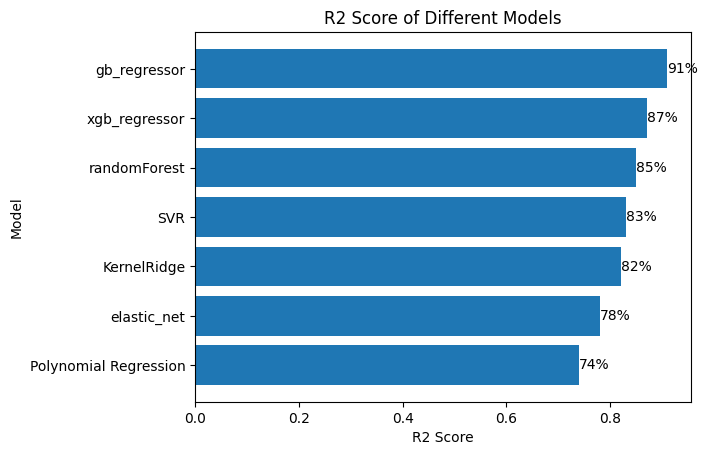

In [260]:
evaluation_df = pd.DataFrame(records)
plt.barh(evaluation_df['model'],evaluation_df['R2_score'])

for index, value in enumerate(evaluation_df['R2_score']):
    plt.text(value, index, f'{value:.0%}', va='center')
# Set labels and title
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('R2 Score of Different Models')